#### Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

#### Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

#### Problem 3: Identify which all stocks are moving together and which all stocks are different from each other

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [12]:
data=pd.read_csv('data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [13]:
data.shape

(41266, 502)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


### Problem N0:1

In [20]:
#To check the similarity b/w stocks we check the correlation b/w different stocks.
data_corr=data.copy()
data_corr.drop(['DATE','SP500'],inplace=True,axis=1)
corr=data_corr.corr()

In [21]:
corr_data=pd.DataFrame(data=corr.values,columns=corr.index,index=corr.index)
corr_data.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


### Problem No:2

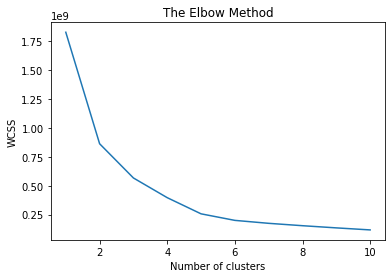

In [26]:
wcss=[] # for choosing the K value in the clustering
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_corr)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_corr)
print(y_kmeans)

[0 0 0 ... 3 3 3]


In [29]:
data_corr['Cluster'] = y_kmeans

In [30]:
data_corr['Cluster'].value_counts()

4    12029
1     8905
0     6976
2     6709
3     6647
Name: Cluster, dtype: int64

In [32]:
data_corr.tail()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Cluster
41261,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,45.130,12.985,...,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250,3
41262,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,45.130,12.985,...,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100,3
41263,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,45.135,12.970,...,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850,3
41264,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,45.065,12.965,...,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301,3
41265,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,45.120,13.000,...,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800,3


### Problem No:3

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
X_scaled = sc.fit_transform(data_corr)

In [35]:
pca = PCA(n_components=150)
pca.fit(X_scaled)
# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[46.97 64.21 76.28 81.13 84.92 87.73 89.73 91.03 92.08 92.83 93.51 94.09
 94.56 95.02 95.42 95.76 96.09 96.35 96.58 96.8  96.99 97.15 97.3  97.43
 97.56 97.68 97.79 97.89 97.98 98.06 98.14 98.22 98.29 98.36 98.42 98.48
 98.54 98.59 98.64 98.69 98.73 98.77 98.81 98.85 98.89 98.92 98.95 98.98
 99.01 99.04 99.07 99.1  99.13 99.15 99.17 99.19 99.21 99.23 99.25 99.27
 99.29 99.31 99.33 99.35 99.37 99.39 99.41 99.43 99.44 99.45 99.46 99.47
 99.48 99.49 99.5  99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59
 99.6  99.61 99.62 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71
 99.72 99.73 99.74 99.75 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76
 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76
 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76
 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76 99.76
 99.76 99.76 99.76 99.76 99.76 99.76]


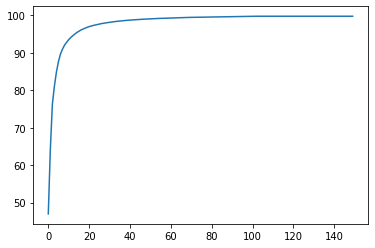

In [36]:
plt.plot(var1)

In [37]:
pca = PCA(n_components =25)
X = pca.fit_transform(X_scaled)
print(X)

[[ 25.59363672  10.09867467  -9.26687443 ...   0.53260108   0.20449009
    2.55501408]
 [ 25.69249023   9.98979091  -9.68791696 ...   0.43294572   0.29572303
    2.48020151]
 [ 25.60700536   9.92120429  -9.56224001 ...   0.5094227    0.16043321
    2.21433374]
 ...
 [-22.77018064  13.27026493   6.69472513 ...  -2.17041752   1.24079273
   -0.17497277]
 [-22.61449225  13.35958219   6.80930655 ...  -2.15588509   1.24653692
   -0.20089407]
 [-22.72252364  13.30516672   6.73695996 ...  -2.19349829   1.22846262
   -0.15563823]]


In [38]:
print('Number of PCA :',len(pca.components_))

Number of PCA : 25


In [39]:
comppresed_data = pd.DataFrame(pca.components_, columns = data_corr.columns)
comppresed_data.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Cluster
0,-0.039254,-0.041059,-0.062889,-0.009825,-0.035795,-0.054692,0.050387,-0.035306,-0.044086,-0.014592,...,0.056996,-0.054638,-0.050592,0.047163,-0.057850,-0.061346,-0.062487,0.002527,-0.051739,-0.025797
1,-0.063704,0.033396,0.001910,-0.032702,0.043872,-0.029691,0.016531,0.058736,-0.052666,0.013191,...,0.029971,0.013183,-0.040270,-0.052570,0.010651,0.031586,-0.020448,-0.080520,-0.059523,-0.050062
2,-0.040806,0.064093,0.011815,0.042493,-0.036677,0.039735,-0.053343,-0.050263,0.029541,-0.086071,...,0.022471,0.059501,-0.035223,-0.029167,-0.038858,-0.004082,0.020524,-0.067221,0.022563,0.078234
3,0.007839,0.077520,0.008808,-0.027028,-0.017389,0.009558,-0.032526,0.033816,0.052241,-0.077627,...,0.060875,-0.039187,0.027729,0.012065,-0.039838,0.002855,-0.002488,-0.049313,0.015453,-0.035901
4,-0.033461,-0.016952,0.002192,-0.039253,-0.101804,-0.035235,-0.011059,0.038181,-0.040087,-0.014804,...,-0.011199,-0.030687,-0.011934,-0.045477,0.029230,-0.002960,-0.001497,-0.003980,0.005199,0.025948


In [46]:
comppresed_data.drop(['Cluster'],axis=1,inplace=True)
comppresed_data.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039254,-0.041059,-0.062889,-0.009825,-0.035795,-0.054692,0.050387,-0.035306,-0.044086,-0.014592,...,-0.049434,0.056996,-0.054638,-0.050592,0.047163,-0.057850,-0.061346,-0.062487,0.002527,-0.051739
1,-0.063704,0.033396,0.001910,-0.032702,0.043872,-0.029691,0.016531,0.058736,-0.052666,0.013191,...,-0.058716,0.029971,0.013183,-0.040270,-0.052570,0.010651,0.031586,-0.020448,-0.080520,-0.059523
2,-0.040806,0.064093,0.011815,0.042493,-0.036677,0.039735,-0.053343,-0.050263,0.029541,-0.086071,...,-0.004159,0.022471,0.059501,-0.035223,-0.029167,-0.038858,-0.004082,0.020524,-0.067221,0.022563
3,0.007839,0.077520,0.008808,-0.027028,-0.017389,0.009558,-0.032526,0.033816,0.052241,-0.077627,...,0.021916,0.060875,-0.039187,0.027729,0.012065,-0.039838,0.002855,-0.002488,-0.049313,0.015453
4,-0.033461,-0.016952,0.002192,-0.039253,-0.101804,-0.035235,-0.011059,0.038181,-0.040087,-0.014804,...,-0.036581,-0.011199,-0.030687,-0.011934,-0.045477,0.029230,-0.002960,-0.001497,-0.003980,0.005199
